In [2]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from PYTHON import generate_simulated_data as gsd
import matplotlib.pyplot as plt
import pystan
import pickle
%matplotlib inline

In [9]:
data_dict = gsd.generate_simulated_data()

model_name = 'HBMNL_1.1'

with open('./MODELS/{0}.stan'.format(model_name), 'r') as f:
    stan_model = f.read()

try:
    sm = pickle.load(open('./MODELS/{0}.pkl'.format(model_name), 'rb'))

except:
    sm = pystan.StanModel(model_code=stan_model)
    with open('./MODELS/{0}.pkl'.format(model_name), 'wb') as f:
        pickle.dump(sm, f)

fit01 = sm.sampling(data=data_dict, iter=800, chains=2)
fit02 = sm.sampling(data=data_dict, iter=800, chains=2, control={'max_treedepth':3})
fit03 = sm.sampling(data=data_dict, iter=800, chains=2, control={'max_treedepth':3})

Y_pred01 = fit01.extract(['log_lik'])['log_lik']
Y_pred02 = fit02.extract(['log_lik'])['log_lik']
Y_pred03 = fit03.extract(['log_lik'])['log_lik']

(800, 100, 10)
[3 1 1 4 1 2 4 1 3 4]


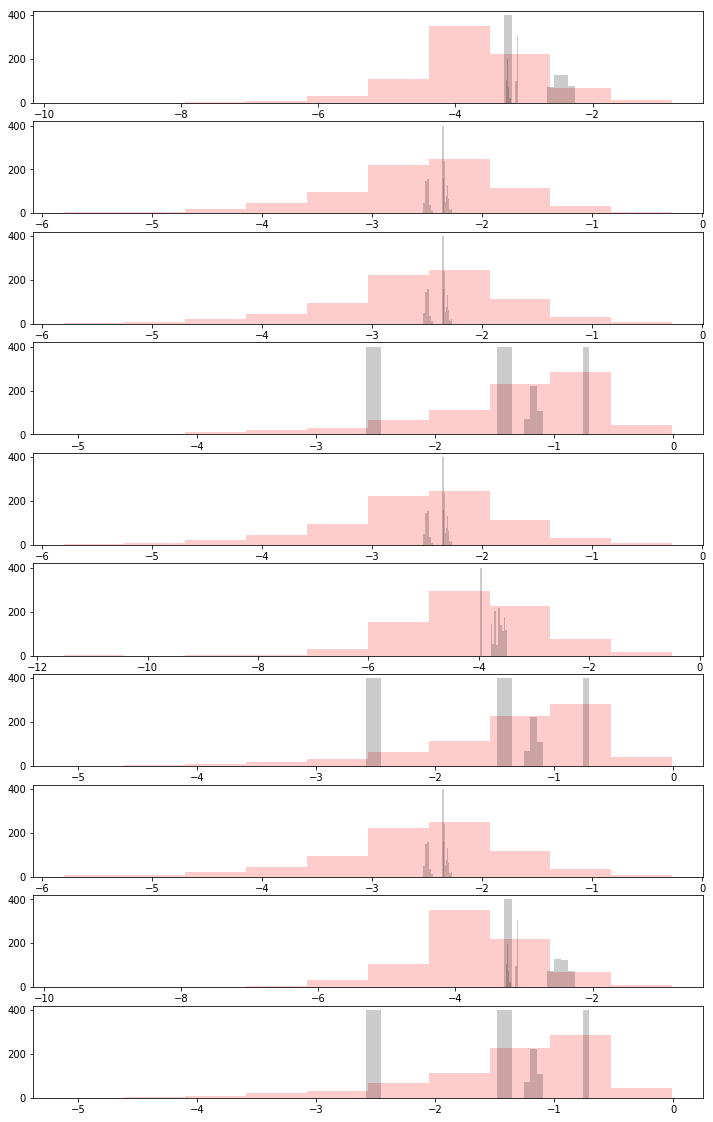

In [10]:
print(Y_pred01.shape)
#stats.mode(Y_pred01, axis=0)[0]
i = 13
j = 0
fig,ax = plt.subplots(ncols=1, nrows=10, figsize=(12,20))
for j in range(10):
    ax[j].hist(Y_pred01[:,i,j], color='r', alpha=.2)
    ax[j].hist(Y_pred02[:,i,j], color='k', alpha=.2)
    ax[j].hist(Y_pred03[:,i,j], color='k', alpha=.2)

print(data_dict['Y'][i,:])

plt.show()

In [13]:
Y_pred = Y_pred01 + Y_pred02 + Y_pred03
Y_pred.shape

(800, 100, 10)

(array([   5.,   11.,   20.,   61.,  118.,  204.,  209.,  135.,   28.,    9.]),
 array([-10.86481576, -10.23064434,  -9.59647293,  -8.96230151,
         -8.32813009,  -7.69395867,  -7.05978725,  -6.42561583,
         -5.79144442,  -5.157273  ,  -4.52310158]),
 <a list of 10 Patch objects>)

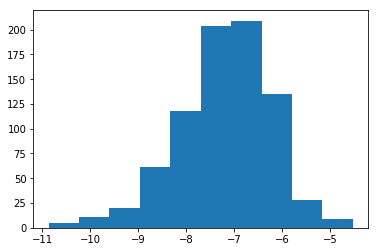

In [16]:
plt.hist(Y_pred[:,0,0])